In [1]:
import os, sys, string, time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
from matplotlib import patheffects
import joblib
from datetime import date
import csv

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Functions as Functions
import Utilities.Variables_list as Var_list
from Utilities.ipython_exit import exit

print ('Success')


Success


## Purpose 

This notebook was written just to look at the T2K limits (https://arxiv.org/abs/1902.07598). They include some auxiliary data that contains MORE than is plotted in the paper for the $|U_{\mu4}|$ limits. <br>
Due to the way it is calculated, the PROFILING limit is comparable to our result, but NOT the MARGINALIZING, as for that they integrate over non-zero $|U_{e4}|$.

## Reading limit .csvs

In [20]:
#-----MY CURRENT observed limits-----#
def Read_dat(filename):
    """
    Read in data from .dat files.
    """
    with open(filename) as f:
        lines = f.readlines()
    
    mass_list = []
    Ue4_list, Umu4_list = [], []

    for line in lines:
        mass_value = float(line.split(" ")[0]) #In MeV
        Ue4 = float(line.split(" ")[1])
        Umu4 = float(line.split(" ")[2])
        mass_list.append(mass_value)
        Ue4_list.append(Ue4)
        Umu4_list.append(Umu4)
        
    all_vals = {"mass":mass_list, "Ue4":Ue4_list, "Umu4":Umu4_list}
        
    return all_vals
    
T2K_profiling = Read_dat('limit_files/limits_profiling.dat')
T2K_marginal = Read_dat('limit_files/limits_marginalisation.dat')

uboone_ee_obs = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_8_bins_ee_full_Finished_10.csv')
uboone_pi0_obs = Functions.Pandafy('limit_files/My_limits/Full_sys_8_bins_pi0_pi0_full_Finished_10.csv')
uboone_full_combined =  Functions.Pandafy('limit_files/combined_full_uboone.csv')

T2K_marginal_paper = Functions.Pandafy('limit_files/T2K_2020_marginal.csv')


In [16]:
print(T2K_profiling)

{'mass': [140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0], 'Ue4': [4.60467988575e-07, 2.35384057512e-07, 1.17619724641e-07, 6.9090766603e-08, 4.34977484924e-08, 3.00754747615e-08, 2.17544537649e-08, 1.60911871325e-08, 1.27849703802e-08, 1.11313329493e-08, 8.11729346828e-09, 6.60254586786e-09, 5.49054200206e-09, 4.74360305291e-09, 4.02621799041e-09, 3.42960381318e-09, 3.00621097276e-09, 2.71062712483e-09, 2.43125730036e-09, 1.970217928e-09, 1.84018282691e-09, 1.63264927905e-09, 1.38744533941e-09, 1.23747346319e-09, 1.20640064951e-09, 1.05824444266e-09, 9.9833063121e-10, 9.61834352668e-10, 9.11575547881e-10, 8.99170590004e-10, 8.91822501496e-10, 9.68684126866e-10, 9.83061767123e-10, 1.14163523074e-09, 1.42947874511e-09, 2.48656579412e-09], 'Umu4': [7.29889631184e-07, 5.4405535591e-07, 3.

Do you want to save the figure as T2K_auxiliary_limits_comparison? y/n n


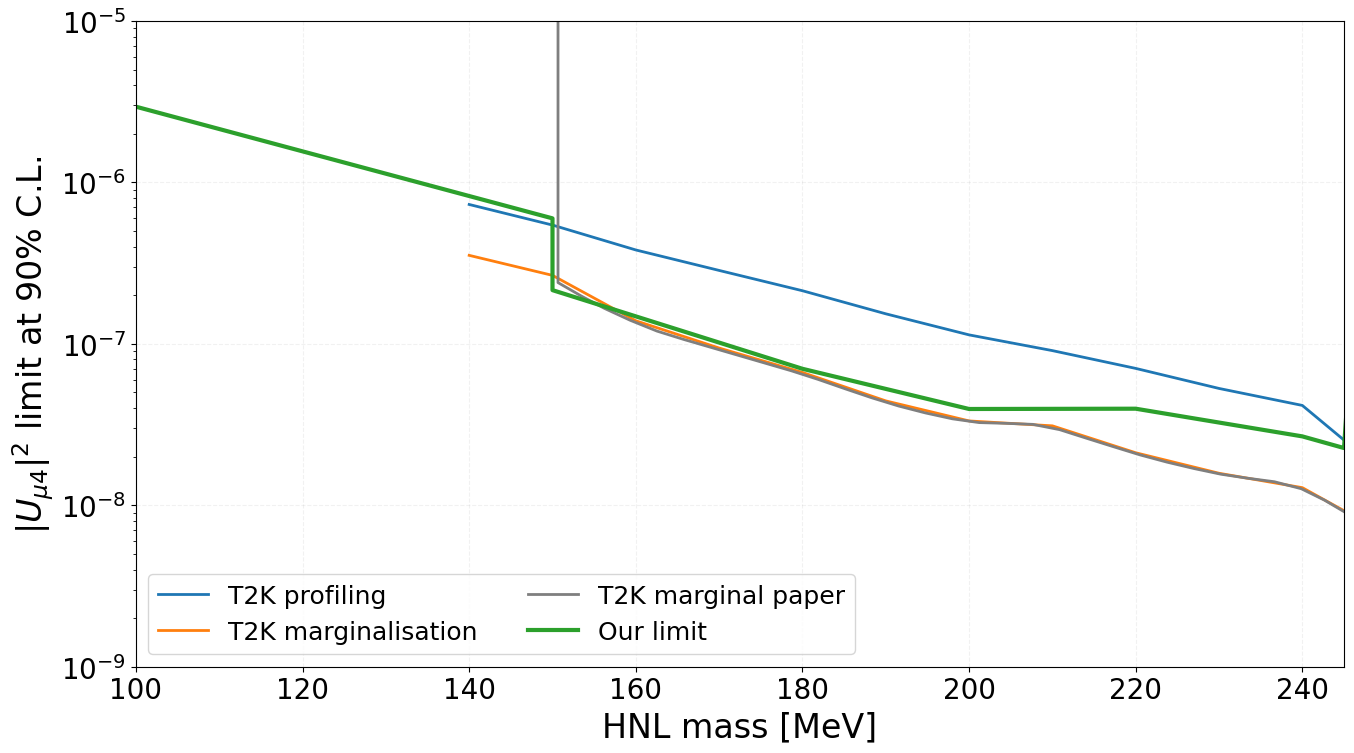

In [21]:
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

plt.plot(T2K_profiling["mass"], T2K_profiling["Umu4"], label="T2K profiling", lw=2)
plt.plot(T2K_marginal["mass"], T2K_marginal["Umu4"], label="T2K marginalisation", lw=2)

# plt.plot(T2K_marginal_paper['Mass'],T2K_marginal_paper['Value'],label=r"T2K marginal paper",color="C7",lw=2)

plt.plot(uboone_full_combined["Mass"], uboone_full_combined["Value"], label="Our limit", lw=3)

plt.xlabel('HNL mass [MeV]',fontsize=24)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=24)
# plt.legend()
plt.ylim(1e-9,1e-5) #2e-9
plt.xlim(100,245)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 18}, loc="lower left",ncol=2)

plt.tight_layout()

name = f"T2K_auxiliary_limits_comparison"

savefig = input(f"Do you want to save the figure as {name}? y/n")

if savefig == "y":
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## End of code